### Importation des librairies

In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


### Lecture des données et convertion des dates

In [78]:
df = pd.read_csv('../../data/collisions_routieres.csv')
mapbox_token = "pk.eyJ1IjoidG91amVyMDAiLCJhIjoiY2wwbWt6M3ptMTdhdTNibjU0OGFyMzc3ZiJ9.PYFp4yto8WHEODgZpWbDVQ"
px.set_mapbox_access_token(mapbox_token)
df["DT_ACCDN"] = pd.to_datetime(df["DT_ACCDN"])
df["year"] = df["DT_ACCDN"].dt.year
df["month"] = df["DT_ACCDN"].dt.month
df["day"] = df["DT_ACCDN"].dt.day
df["weekday"] = df["DT_ACCDN"].dt.weekday

### preparation des données utilisées pour la viz

In [79]:
def convert_gravite(x, split_mort_grave=False):
    # Takes GRAVITE as input
    if split_mort_grave:
        if x == 'Mortel':
            return 'MORTEL'
        elif x == 'Grave':
            return 'GRAVE'
        else:
            return 'LEGER_MATERIEL'
    else:
        
        if x in ['Mortel', 'Grave']:
            return 'GRAVE_MORTEL'
        else:
            return 'LEGER_MATERIEL'

    
def convert_type(x):
    #Takes nb_camionLourd_tractRoutier as input
    if x > 0:
        return 'CAMION'
    else:
        return 'SANS_CAMION'

In [80]:
# GRAVE_MORTEL OU LEGER_MATERIEL
df['GRAVITE_RENAME'] = df.loc[:, 'GRAVITE'].apply(lambda x : convert_gravite(x))
df['GRAVITE_SPLIT'] = df.loc[:, 'GRAVITE'].apply(lambda x : convert_gravite(x, split_mort_grave=True))

In [81]:
# CAMION OU SANS_CAMION
df['TYPE_VEHICULE'] = df.loc[:, 'nb_camionLourd_tractRoutier'].apply(lambda x: convert_type(x))

# MOKCUP

## Viz #1 : Est-ce que les accidents semblent diminuer à Montréal depuis l'annonce de Vision Zéro

#### Version nombre en fonction du temps

In [72]:
df1_count = df.groupby('year').size()
df1_count.name = 'count'

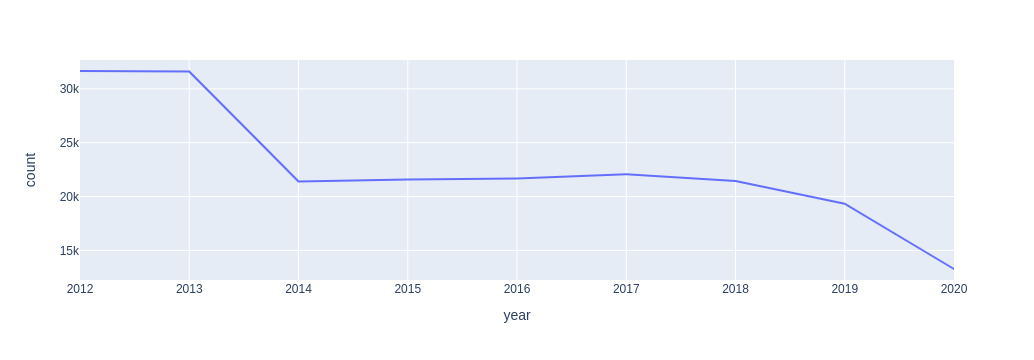

In [73]:
px.line(df1_count.reset_index(), x='year', y='count')

## Viz #2 : Est-ce que les accidents semblent diminuer à Montréal depuis l'annonce de Vision Zéro pour tous les types de véhicule

In [74]:
df2_count = df.groupby(['TYPE_VEHICULE','year']).size()
df2_count.name = 'count'

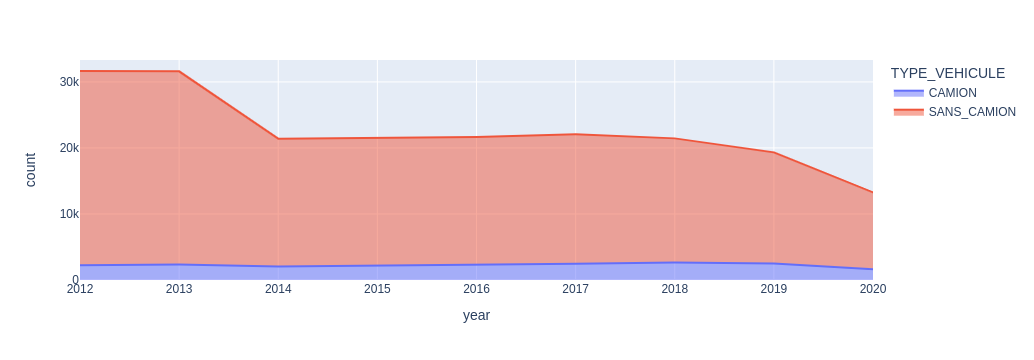

In [75]:
px.area(df2_count.reset_index(), x='year', y='count', color='TYPE_VEHICULE', )

## VIZ 3 : Quel est le ratio d'accident GM avec camion par rapport à lorsque les camions sont impliqués?

In [83]:
df3

,TYPE_VEHICULE,GRAVITE_SPLIT,count,ratio
0,CAMION,GRAVE,124,0.006112
1,CAMION,LEGER_MATERIEL,20114,0.991424
2,CAMION,MORTEL,50,0.002465
3,SANS_CAMION,GRAVE,1556,0.008469
4,SANS_CAMION,LEGER_MATERIEL,181979,0.990513
5,SANS_CAMION,MORTEL,187,0.001018


In [88]:
df3 = df.groupby(['TYPE_VEHICULE', 'GRAVITE_SPLIT']).size()
df3.name = 'count'
df3 = df3.reset_index()
df3['pourcentage'] = df3.apply(lambda row : row.loc['count'] *100 / df3[df3['TYPE_VEHICULE'] == row.loc['TYPE_VEHICULE']]['count'].sum(),
                         axis=1)

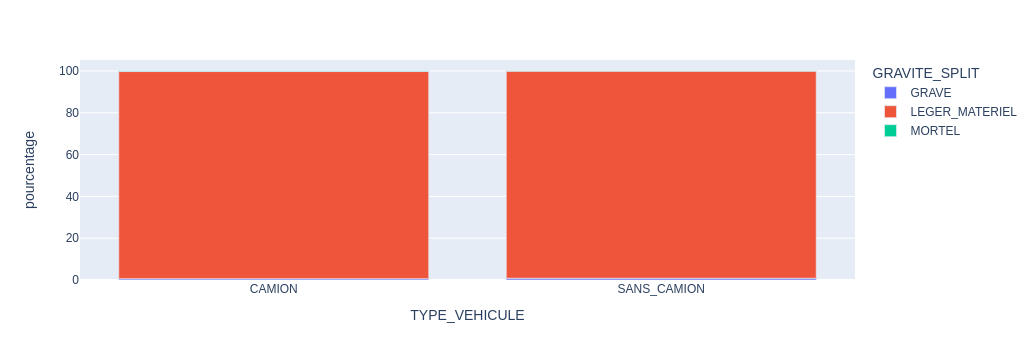

In [90]:
px.bar(df3, x='TYPE_VEHICULE', y='pourcentage', color='GRAVITE_SPLIT')

In [91]:
df3

,TYPE_VEHICULE,GRAVITE_SPLIT,count,pourcentage
0,CAMION,GRAVE,124,0.611199
1,CAMION,LEGER_MATERIEL,20114,99.142350
2,CAMION,MORTEL,50,0.246451
3,SANS_CAMION,GRAVE,1556,0.846932
4,SANS_CAMION,LEGER_MATERIEL,181979,99.051284
5,SANS_CAMION,MORTEL,187,0.101784


## VIZ 3 : CONTEXTE DES ACCIDENTS (

In [92]:
# Garder seulement les 20k accidents de camion et comprendre mieux les 174 qui sont graves ou mortel
# pour CD_ENVRN_ACCDN, CD_CATEG_ROUTE, VITESSE_AUTOR

In [126]:
def viz_context(data_df, var):
    col = ['TYPE_VEHICULE', 'GRAVITE_RENAME']
    col.append(var)
    df4 = data_df.groupby(col).size().loc['CAMION']
    df4.name = 'nombre'
    df4 = df4.reset_index()
    df4['pourcentage'] = df4.apply(lambda row : row.loc['nombre']/ df4[df4['GRAVITE_RENAME'] == row['GRAVITE_RENAME']]['nombre'].sum(),
                                   axis=1)
    fig = px.bar(df4,
        x=var,
        y='pourcentage',
        color='GRAVITE_RENAME',
        barmode='group')
    return fig


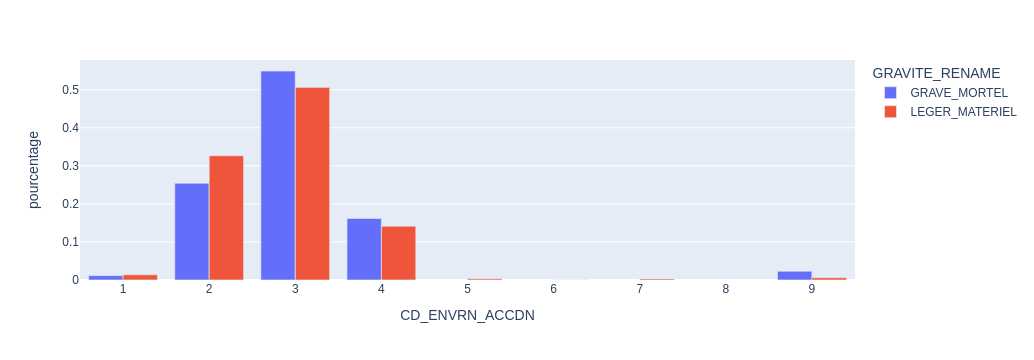

In [127]:
viz_context(df, 'CD_ENVRN_ACCDN')

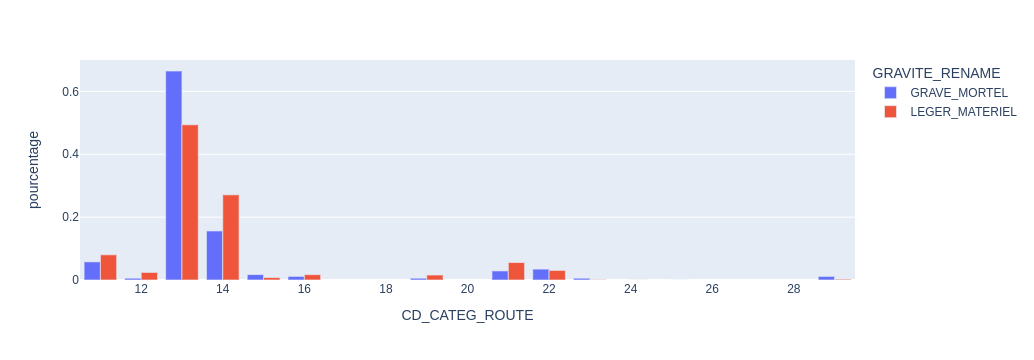

In [128]:
viz_context(df, 'CD_CATEG_ROUTE')

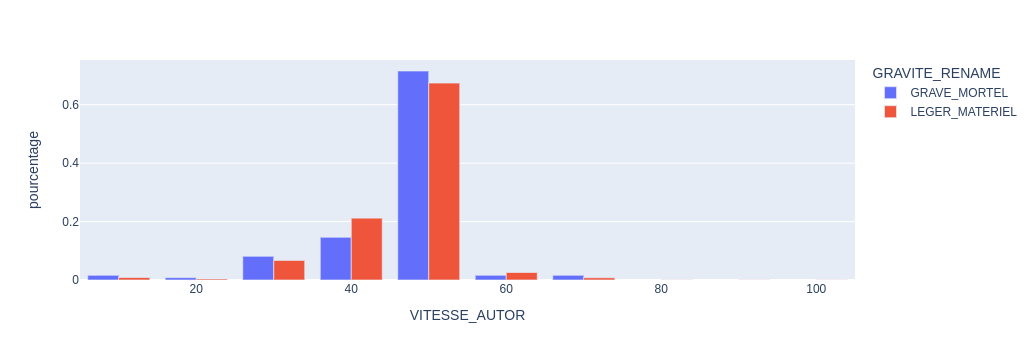

In [129]:
viz_context(df, 'VITESSE_AUTOR')

### TEST PARRALLE LEGISLATIF

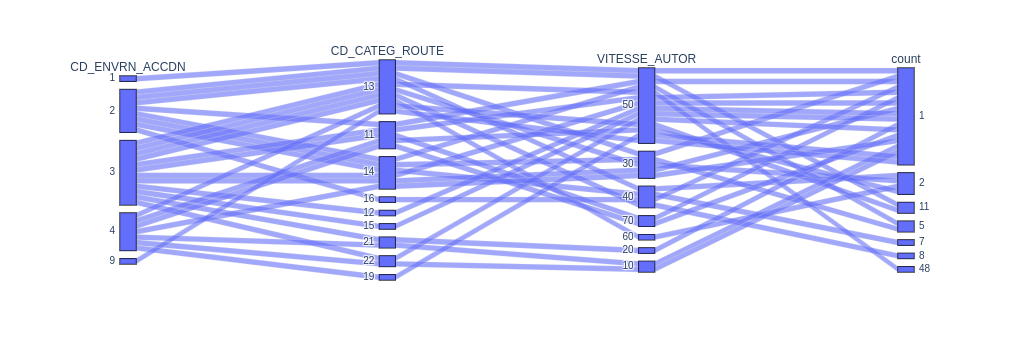

In [159]:
col5 = ['TYPE_VEHICULE', 'GRAVITE_RENAME', 'CD_ENVRN_ACCDN', 'CD_CATEG_ROUTE', 'VITESSE_AUTOR']
df5 = df.groupby(col5).size()
df5.name = 'count'
df5 = df5.loc['CAMION'].loc['GRAVE_MORTEL'].reset_index()
px.parallel_categories(df5.)

In [144]:
df5

,GRAVITE_RENAME,CD_ENVRN_ACCDN,CD_CATEG_ROUTE,VITESSE_AUTOR,count
0,GRAVE_MORTEL,1.0,13.0,50.0,1
1,GRAVE_MORTEL,2.0,11.0,50.0,1
2,GRAVE_MORTEL,2.0,13.0,30.0,1
3,GRAVE_MORTEL,2.0,13.0,40.0,2
4,GRAVE_MORTEL,2.0,13.0,50.0,11
...,...,...,...,...,...
236,LEGER_MATERIEL,9.0,21.0,10.0,2
237,LEGER_MATERIEL,9.0,21.0,20.0,1
238,LEGER_MATERIEL,9.0,22.0,20.0,1
239,LEGER_MATERIEL,9.0,23.0,50.0,1


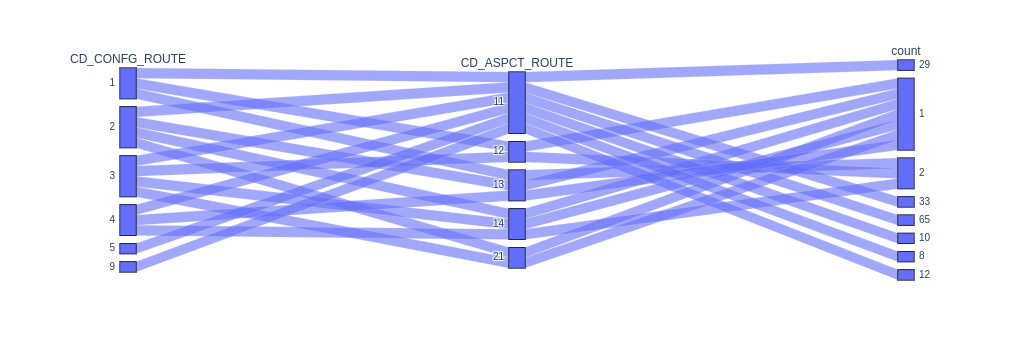

In [158]:
col6 = ['TYPE_VEHICULE', 'GRAVITE_RENAME', 'CD_CONFG_ROUTE', 'CD_ASPCT_ROUTE']
df6 = df.groupby(col6).size()
df6.name = 'count'
df6 = df6.loc['CAMION'].loc['GRAVE_MORTEL'].reset_index()
px.parallel_categories(df6.iloc[:, 0:3])

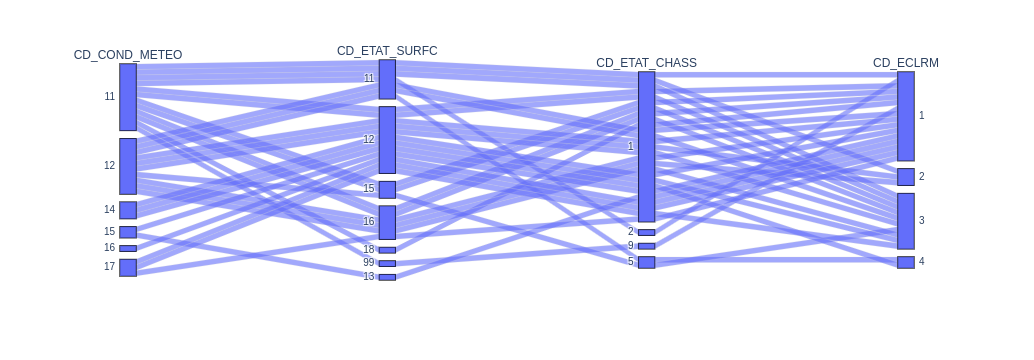

In [157]:
col7 = ['TYPE_VEHICULE', 'GRAVITE_RENAME', 'CD_COND_METEO', 'CD_ETAT_SURFC', 'CD_ETAT_CHASS', 'CD_ECLRM']
df7 = df.groupby(col7).size()
df7.name = 'count'
df7 = df7.loc['CAMION'].loc['GRAVE_MORTEL'].reset_index()
px.parallel_categories(df7.iloc[:,:-1])